In [1]:
import pandas as pd
import numpy as np
import os
import glob
import random

import warnings
warnings.filterwarnings("ignore")

## Baseline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.tail()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0
52559,1094,23,30,0,0,2.1,67.70,-4,0.0


In [5]:
test_files = glob.glob('test/*.csv')
len(test_files)

81

In [6]:
print(test_files[0])
test1 = pd.read_csv(test_files[0])
test1.head(48)

test\0.csv


,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,2.7,34.42,0.0,0.000000
1,0,0,30,0,0,2.7,34.17,0.1,0.000000
2,0,1,0,0,0,2.7,34.23,0.2,0.000000
3,0,1,30,0,0,2.7,33.99,0.3,0.000000
4,0,2,0,0,0,2.8,33.97,0.4,0.000000
5,0,2,30,0,0,2.9,33.48,0.6,0.000000
6,0,3,0,0,0,3.0,33.97,0.7,0.000000
7,0,3,30,0,0,3.1,33.44,0.9,0.000000
8,0,4,0,0,0,3.3,34.37,1.1,0.000000
9,0,4,30,0,0,3.4,34.37,1.1,0.000000


In [7]:
test_files[0]

'test\\0.csv'

In [8]:
test1

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,2.7,34.42,0.0,0.0
1,0,0,30,0,0,2.7,34.17,0.1,0.0
2,0,1,0,0,0,2.7,34.23,0.2,0.0
3,0,1,30,0,0,2.7,33.99,0.3,0.0
4,0,2,0,0,0,2.8,33.97,0.4,0.0
...,...,...,...,...,...,...,...,...,...
331,6,21,30,0,0,3.6,56.09,-8.0,0.0
332,6,22,0,0,0,3.4,53.54,-8.2,0.0
333,6,22,30,0,0,3.4,53.89,-8.3,0.0
334,6,23,0,0,0,3.4,51.96,-8.4,0.0


In [9]:
submission = pd.read_csv('sample_submission.csv')

In [10]:
submission.tail()

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7775,80.csv_Day8_23h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import pandas as pd

series = pd.read_csv('train.csv', header=0, index_col=0, squeeze=True)
series

,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
Day,,,,,,,,
0,0,0,0,0,1.5,69.08,-12,0.0
0,0,30,0,0,1.5,69.06,-12,0.0
0,1,0,0,0,1.6,71.78,-12,0.0
0,1,30,0,0,1.6,71.75,-12,0.0
0,2,0,0,0,1.6,75.20,-12,0.0
...,...,...,...,...,...,...,...,...
1094,21,30,0,0,2.4,70.70,-4,0.0
1094,22,0,0,0,2.4,66.79,-4,0.0
1094,22,30,0,0,2.2,66.78,-4,0.0


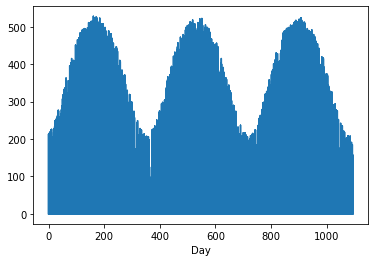

In [19]:
series['DHI'].plot()

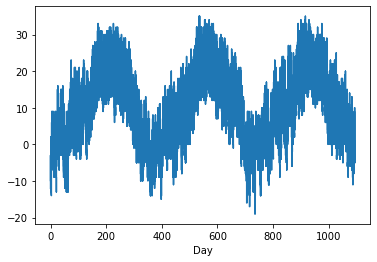

In [22]:
series['T'].plot()

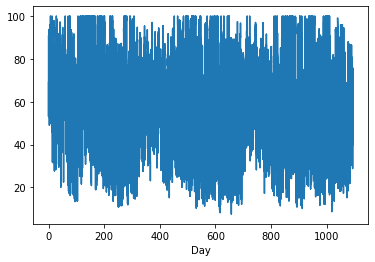

In [23]:
series['RH'].plot()

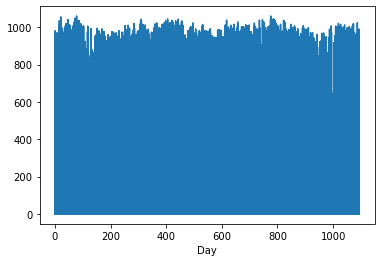

In [20]:
series['DNI'].plot()

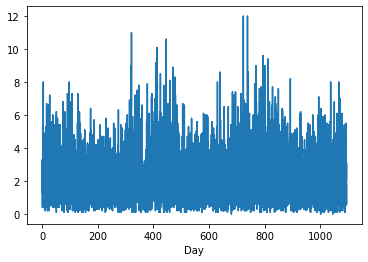

In [21]:
series['WS'].plot()

In [ ]:
def create_lag_feats(data, lags, cols):
    
    lag_cols = []
    temp = data.copy()
    for col in cols:
        for lag in lags:
            temp[col + '_lag_%s'%lag] = temp[col].shift(lag)
            temp['Target1'] = temp['TARGET']
            temp['Target2'] = temp['TARGET'].shift(-48).fillna(method='ffill')  
            lag_cols.append(col + '_lag_%s'%lag)

    return temp, lag_cols
    

def preprocess_data(data, target_lags=[48], weather_lags=[48], is_train=True):
    
    temp = data.copy()

    if is_train==True:          
    
        temp, temp_lag_cols1 = create_lag_feats(temp, target_lags, ['TARGET'])
        temp, temp_lag_cols2 = create_lag_feats(temp, weather_lags, ['DHI', 'DNI', 'WS', 'RH', 'T'])
     
        return temp[['Hour'] + temp_lag_cols1 + temp_lag_cols2 + ['Target1', 'Target2']].dropna()

    elif is_train==False:    
        
        temp, temp_lag_cols1 = create_lag_feats(temp, target_lags, ['TARGET'])
        temp, temp_lag_cols2 = create_lag_feats(temp, weather_lags, ['DHI', 'DNI', 'WS', 'RH', 'T'])
                              
        return temp[['Hour'] + temp_lag_cols1 + temp_lag_cols2].dropna()


df_train = preprocess_data(train, target_lags=[48], weather_lags=[48], is_train=True)
df_train.iloc[:48]

In [ ]:
train.iloc[48:96]

In [ ]:
train.iloc[48+48:96+48]

In [ ]:
df_train.tail()

In [ ]:
df_test = []

for test_file in test_files:
    temp = pd.read_csv(test_file)
    temp = preprocess_data(temp, target_lags=[48], weather_lags=[48], is_train=False).iloc[-48:]
    df_test.append(temp)

X_test = pd.concat(df_test)
X_test.shape

In [ ]:
temp = pd.read_csv(test_files[0])
preprocess_data(temp, target_lags=[48], weather_lags=[48], is_train=False).iloc[-48:].shape

In [ ]:
X_test.head()

In [ ]:
X_test.duplicated().sum()

In [ ]:
X_test[X_test.duplicated()]

In [ ]:
df_train.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -2], test_size=0.3, random_state=0)
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(df_train.iloc[:, :-2], df_train.iloc[:, -1], test_size=0.3, random_state=0)

In [ ]:
X_train_1.head()

In [ ]:
X_test.head()

In [ ]:
X_test.head()

In [ ]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
from lightgbm import LGBMRegressor

# Get the model and the predictions in (a) - (b)
def LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test):
    
    # (a) Modeling  
    model = LGBMRegressor(objective='quantile', alpha=q,
                         n_estimators=10000, bagging_fraction=0.75, learning_rate=0.027, subsample=0.75)                   
                         
                         
    model.fit(X_train, Y_train, eval_metric = ['quantile'], 
          eval_set=[(X_valid, Y_valid)], early_stopping_rounds=300, verbose=500)

    # (b) Predictions
    pred = pd.Series(model.predict(X_test).round(2))
    return pred, model

In [ ]:
# Target 예측

def train_data(X_train, Y_train, X_valid, Y_valid, X_test):

    LGBM_models=[]
    LGBM_actual_pred = pd.DataFrame()

    for q in quantiles:
        print(q)
        pred , model = LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test)
        LGBM_models.append(model)
        LGBM_actual_pred = pd.concat([LGBM_actual_pred,pred],axis=1)

    LGBM_actual_pred.columns=quantiles
    
    return LGBM_models, LGBM_actual_pred

In [ ]:
# Target1
models_1, results_1 = train_data(X_train_1, Y_train_1, X_valid_1, Y_valid_1, X_test)
results_1.sort_index()[:48]

In [ ]:
# Target2
models_2, results_2 = train_data(X_train_2, Y_train_2, X_valid_2, Y_valid_2, X_test)
results_2.sort_index()[:48]

In [ ]:
results_1.sort_index().iloc[:48]

In [ ]:
results_2.sort_index()

In [ ]:
submission.loc[submission.id.str.contains("Day7"), "q_0.1":] = results_1.sort_index().values
submission.loc[submission.id.str.contains("Day8"), "q_0.1":] = results_2.sort_index().values
submission

In [ ]:
submission.iloc[:48]

In [ ]:
submission.iloc[48:96]

In [ ]:
submission.to_csv('submission2.csv', index=False)